In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

import plotly.express as px

In [2]:
eui_boston_df = pd.read_csv("../data/02_interim/eui_boston.csv")
eui_boston_df["Region Grouped"] = "BOS"

eui_seattle_df = pd.read_csv("../data/02_interim/eui_seattle.csv")
eui_seattle_df["Region Grouped"] = "SEA"

eui_california_df = pd.read_csv("../data/02_interim/eui_california.csv")
eui_california_df["Region Grouped"] = "CA"

eui_nyc_df = pd.read_csv("../data/02_interim/eui_nyc.csv")
eui_nyc_df["Region Grouped"] = "NYC"

eui_chicago_df = pd.read_csv("../data/02_interim/eui_chicago.csv")
eui_chicago_df["Region Grouped"] = "CHI"

eui_philadelphia_df = pd.read_csv("../data/02_interim/eui_philadelphia.csv")
eui_philadelphia_df["Region Grouped"] = "PHL"

eui_miami_df = pd.read_csv("../data/02_interim/eui_miami.csv")
eui_miami_df["Region Grouped"] = "MIA"

eui_usa_cities_df = pd.concat([
    eui_boston_df,
    eui_seattle_df,
    eui_california_df,
    eui_nyc_df,
    eui_chicago_df,
    eui_philadelphia_df,
    eui_miami_df
], ignore_index=True)

eui_usa_cities_df

,latitude,longitude,Residential EUI (kWh/m2/year),Non-residential EUI (kWh/m2/year),Residential Area (ft²),Non-residential Area (ft²),Region Grouped
0,42.3555,-71.0565,NaN,211.366466,NaN,236688.0,BOS
1,42.3555,-71.0565,175.364314,NaN,135344.0,NaN,BOS
2,42.3555,-71.0565,NaN,117.565942,NaN,255383.0,BOS
3,42.3555,-71.0565,NaN,174.410412,NaN,134789.0,BOS
4,42.3555,-71.0565,NaN,192.669750,NaN,455682.0,BOS
...,...,...,...,...,...,...,...
93552,25.7617,-80.1918,149.226936,NaN,203531.0,NaN,MIA
93553,25.7617,-80.1918,NaN,144.810071,NaN,411613.0,MIA
93554,25.7617,-80.1918,188.978720,NaN,392040.0,NaN,MIA
93555,25.7617,-80.1918,NaN,129.035553,NaN,401445.0,MIA


In [3]:
eui_usa_cities_df['latitude'] = pd.to_numeric(eui_usa_cities_df['latitude'], errors='coerce')
eui_usa_cities_df['longitude'] = pd.to_numeric(eui_usa_cities_df['longitude'], errors='coerce')
eui_usa_cities_df['Residential EUI (kWh/m2/year)'] = pd.to_numeric(eui_usa_cities_df['Residential EUI (kWh/m2/year)'], errors='coerce')
eui_usa_cities_df['Non-residential EUI (kWh/m2/year)'] = pd.to_numeric(eui_usa_cities_df['Non-residential EUI (kWh/m2/year)'], errors='coerce')
eui_usa_cities_df['Region Detailed'] = eui_usa_cities_df['Region Grouped']

ca_mask = eui_usa_cities_df['Region Grouped'] == 'CA'
eui_usa_cities_df.loc[(ca_mask) & (eui_usa_cities_df['latitude'] >= 35.5), 'Region Detailed'] = 'CA North'
eui_usa_cities_df.loc[(ca_mask) & (eui_usa_cities_df['latitude'] < 35.5), 'Region Detailed'] = 'CA South'

In [4]:
eui_usa_cities_df

,latitude,longitude,Residential EUI (kWh/m2/year),Non-residential EUI (kWh/m2/year),Residential Area (ft²),Non-residential Area (ft²),Region Grouped,Region Detailed
0,42.3555,-71.0565,NaN,211.366466,NaN,236688.0,BOS,BOS
1,42.3555,-71.0565,175.364314,NaN,135344.0,NaN,BOS,BOS
2,42.3555,-71.0565,NaN,117.565942,NaN,255383.0,BOS,BOS
3,42.3555,-71.0565,NaN,174.410412,NaN,134789.0,BOS,BOS
4,42.3555,-71.0565,NaN,192.669750,NaN,455682.0,BOS,BOS
...,...,...,...,...,...,...,...,...
93552,25.7617,-80.1918,149.226936,NaN,203531.0,NaN,MIA,MIA
93553,25.7617,-80.1918,NaN,144.810071,NaN,411613.0,MIA,MIA
93554,25.7617,-80.1918,188.978720,NaN,392040.0,NaN,MIA,MIA
93555,25.7617,-80.1918,NaN,129.035553,NaN,401445.0,MIA,MIA


In [5]:
eui_usa_cities_df.groupby('Region Detailed').size().reset_index(name='Count')

,Region Detailed,Count
0,BOS,2414
1,CA North,8705
2,CA South,13031
3,CHI,21582
4,MIA,174
5,NYC,21132
6,PHL,1135
7,SEA,25384


/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_70555/2414479792.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_70555/2414479792.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


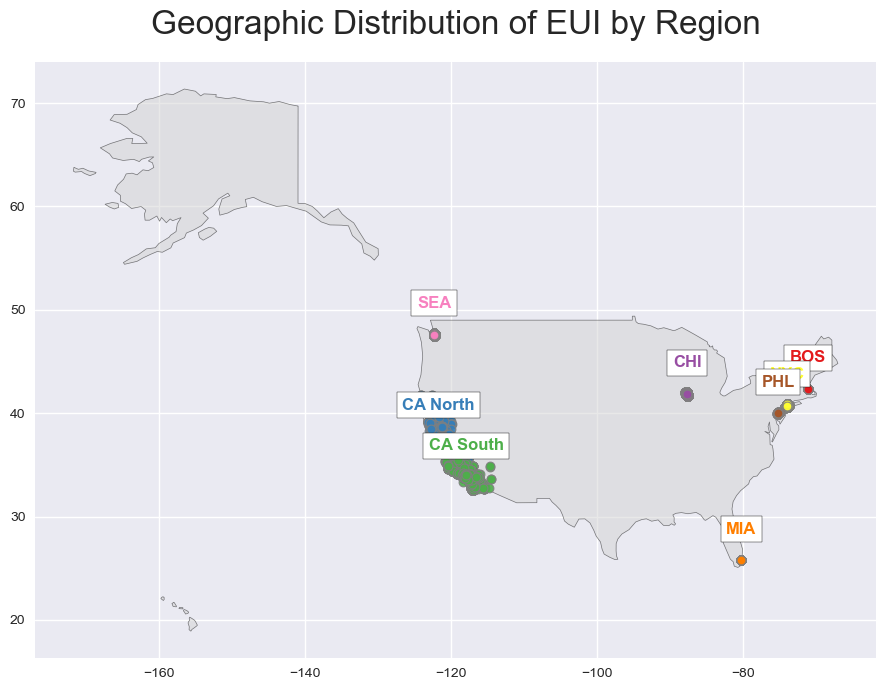

In [6]:
eui_usa_cities_df['latitude'] = pd.to_numeric(eui_usa_cities_df['latitude'], errors='coerce')
eui_usa_cities_df['longitude'] = pd.to_numeric(eui_usa_cities_df['longitude'], errors='coerce')

filtered_df = eui_usa_cities_df.dropna(subset=['latitude', 'longitude'])

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20, 7))  

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world['name'] == 'United States of America']
usa.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.5)

colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', 
          '#FFFF33', '#A65628', '#F781BF', '#999999', '#66C2A5',
          '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F']

unique_regions = sorted(filtered_df['Region Detailed'].unique())
color_dict = dict(zip(unique_regions, colors[:len(unique_regions)]))

for region in unique_regions:
    mask = filtered_df['Region Detailed'] == region
    ax.scatter(filtered_df[mask]['longitude'], 
               filtered_df[mask]['latitude'],
               c=[color_dict[region]],
               label=region,
               alpha=0.9,
               s=40,  
               edgecolor='gray',
               linewidth=0.8)

 
    mean_longitude = filtered_df[mask]['longitude'].mean()
    mean_latitude = filtered_df[mask]['latitude'].mean()

    ax.text(mean_longitude, mean_latitude + 3, region,  
            fontsize=12,  
            color=color_dict[region],
            ha='center', va='center', weight='bold',
            bbox=dict(facecolor='white', alpha=1))

ax.set_title('Geographic Distribution of EUI by Region', fontsize=24, pad=20)
plt.tight_layout()



# Grouped data By city

In [7]:
residential_valid = eui_usa_cities_df.dropna(subset=['Residential EUI (kWh/m2/year)', 'Residential Area (ft²)'])
non_residential_valid = eui_usa_cities_df.dropna(subset=['Non-residential EUI (kWh/m2/year)', 'Non-residential Area (ft²)'])

grouped_df = eui_usa_cities_df.groupby('Region Detailed').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

res_eui_weighted = residential_valid.groupby('Region Detailed').apply(
    lambda x: (x['Residential EUI (kWh/m2/year)'] * x['Residential Area (ft²)']).sum() / x['Residential Area (ft²)'].sum()
).reset_index(name='Residential EUI (kWh/m2/year)')

non_res_eui_weighted = non_residential_valid.groupby('Region Detailed').apply(
    lambda x: (x['Non-residential EUI (kWh/m2/year)'] * x['Non-residential Area (ft²)']).sum() / x['Non-residential Area (ft²)'].sum()
).reset_index(name='Non-residential EUI (kWh/m2/year)')

eui_usa_cities_grouped_df = grouped_df.merge(res_eui_weighted, on='Region Detailed', how='left')\
                     .merge(non_res_eui_weighted, on='Region Detailed', how='left')



In [8]:
eui_usa_cities_grouped_df

,Region Detailed,latitude,longitude,Residential EUI (kWh/m2/year),Non-residential EUI (kWh/m2/year)
0,BOS,42.355500,-71.056500,197.244155,350.017793
1,CA North,37.791250,-121.754217,129.381786,543.700295
2,CA South,33.866414,-117.919020,101.008903,196.081083
3,CHI,41.884601,-87.652890,262.185687,327.467342
4,MIA,25.761700,-80.191800,131.335868,207.250764
5,NYC,40.748925,-73.936167,374.002479,444.009972
6,PHL,39.984673,-75.151166,192.884682,305.366553
7,SEA,47.625240,-122.335012,101.120588,170.370875


In [9]:

city_info = {
    'BOS': {'City': 'Boston', 'GeoNames ID': 4930956, 'Country': 'United States of America'},
    'CA North': {'City': 'Livermore', 'GeoNames ID': 5367440, 'Country': 'United States of America'},
    'CA South': {'City': 'Fullerton', 'GeoNames ID': 5059296, 'Country': 'United States of America'},
    'CHI': {'City': 'Chicago', 'GeoNames ID': 4887398, 'Country': 'United States of America'},
    'MIA': {'City': 'Miami', 'GeoNames ID': 4164138, 'Country': 'United States of America'},
    'NYC': {'City': 'New York City', 'GeoNames ID': 5128581, 'Country': 'United States of America'},
    'PHL': {'City': 'Philadelphia', 'GeoNames ID': 4560349, 'Country': 'United States of America'},
    'SEA': {'City': 'Seattle', 'GeoNames ID': 5809844, 'Country': 'United States of America'}
}

eui_usa_cities_grouped_df['City'] = eui_usa_cities_grouped_df['Region Detailed'].map(lambda x: city_info[x]['City'])
eui_usa_cities_grouped_df['Geonames ID'] = eui_usa_cities_grouped_df['Region Detailed'].map(lambda x: city_info[x]['GeoNames ID'])
eui_usa_cities_grouped_df['Country'] = eui_usa_cities_grouped_df['Region Detailed'].map(lambda x: city_info[x]['Country'])

eui_usa_cities_grouped_df = eui_usa_cities_grouped_df[['City', 'Geonames ID', 'Country', 'Residential EUI (kWh/m2/year)',
       'Non-residential EUI (kWh/m2/year)']]

eui_usa_cities_grouped_df

,City,Geonames ID,Country,Residential EUI (kWh/m2/year),Non-residential EUI (kWh/m2/year)
0,Boston,4930956,United States of America,197.244155,350.017793
1,Livermore,5367440,United States of America,129.381786,543.700295
2,Fullerton,5059296,United States of America,101.008903,196.081083
3,Chicago,4887398,United States of America,262.185687,327.467342
4,Miami,4164138,United States of America,131.335868,207.250764
5,New York City,5128581,United States of America,374.002479,444.009972
6,Philadelphia,4560349,United States of America,192.884682,305.366553
7,Seattle,5809844,United States of America,101.120588,170.370875


In [10]:
eui_usa_cities_grouped_df.to_csv('../data/02_interim/eui_usa_cities_grouped_df.csv', index=False)